<img src="../../predictioNN_Logo_JPG(72).jpg" width=200>

---

## Data Transformations

### Introduction to Data Science
### Last Updated: November 13, 2022
---  


### PREREQUISITES
- variables
- data types
- operators
- pandas DataFrames I
- pandas DataFrames II


### SOURCES
- StandardScaler()  
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- Binarizing data  
https://stackoverflow.com/questions/48472156/binarizing-pandas-dataframe-column

- Transforming data with mathematical functions  
https://www.statology.org/transform-data-in-python/



### OBJECTIVES
- Introduce important data transformations
- Illustrate how to implement the transformations using sklearn
- Understand the benefits of scaling data
- Understand how to scale data
- Understand the benefits of binarizing data
- Understand how to binarize data
- Understand the benefits of one hot encoding data
- Understand how to one hot encode data

### CONCEPTS

- dummy coding categorical data
- data standardization
- StandardScaler()
- binarization of data
- one hot encoding of data
- applying mathematical & statistical functions to data

---

In [4]:
import numpy as np
import pandas as pd

Let's load the World Happiness Report dataset and learn data transformations.

In [5]:
df = pd.read_csv('../datasets/Country_Happiness.csv')
df.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.92) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.632,7.695,7.569,2.595,1.305,1.592,0.874,0.681,0.192,0.393
1,Norway,7.594,7.657,7.530,2.383,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,7.555,7.623,7.487,2.370,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,7.495,7.593,7.398,2.426,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,7.487,7.570,7.405,2.320,1.420,1.549,0.927,0.660,0.256,0.357


## I. Why do we transform data

Data transformation: changing the format, structure, or values of data.  Why do we do it?

Some possible benefits:

- Facilitate compatability between data types or systems (e.g., put different variables on compatible scales)  
  Example: **When variables have different orders of magnitude, some models, like linear regression, can be difficult or impossible to train.** 

- Organize the data better
- Produce better predictors for a model
- Improve data quality to impute missing data (null values), remove unwanted duplicates, or fix incorrect indexing

**Orders of Magnitude**

Orders of magnitude are multiples of 10 (think scientific notation). For example, if variable X ranges between 10-50 and variable Y ranges between 10000-40000, they are separated by three orders of magnitude (difference of three zeroes). This gives a rough guide of their size.

## II. Some Common Transformations

#### Standard Scaler

##### Example of why we might apply Standard Scaler

- Different features in a dataset may be on different scales, like **square footage** and **house price.**  
  If a house is 3,000 square feet while its price is $600,000 these values are separated by two orders of magnitude.  
  Scaling these values will be beneficial when including the data in a model.


When applying Standard Scaler, there are two operations which are both optional:

**Centering** a variable:  
Step 1: Compute the mean (measure of central tendency) of the variable  
Step 2: Subtract this mean from all values of the variable

**Scaling** a variable:  
Step 1: Compute the standard deviation (measure of spread) of the variable  
Step 2: Divide all values of the variable by this standard deviation

##### How can StandardScaler() be applied?

The `StandardScaler()` transformer in Python normalizes the features individually.   

It is possible to apply only centering or only scaling by setting parameters.

Suppose you do both. Then it works like this:

Step 1: Center the data. Each column/feature will have a mean of 0  
Step 2: Scale the data. Each column/feature will have a standard deviation of 1

#### Example of Centering and Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 4 samples/observations and 2 variables/features
data = np.array([[4, 4], [6, 0], [0, 1.5], [1, 1]])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [7]:
data

array([[4. , 4. ],
       [6. , 0. ],
       [0. , 1.5],
       [1. , 1. ]])

In [8]:
scaled_data

array([[ 0.52414242,  1.61155897],
       [ 1.36277029, -1.10264561],
       [-1.15311332, -0.08481889],
       [-0.73379939, -0.42409446]])

compute the mean and standard deviation for each column of data

In [9]:
print('column means:')
print(data.mean(axis=0))
print('')
print('column standard deviations:')
print(data.std(axis=0))

column means:
[2.75  1.625]

column standard deviations:
[2.384848   1.47372827]


using the scaled data, compute the mean and standard deviation of each column

In [10]:
print('column means:')
print(scaled_data.mean(axis=0))
print('')
print('column standard deviations:')
print(scaled_data.std(axis=0))

column means:
[-5.55111512e-17  4.16333634e-17]

column standard deviations:
[1. 1.]


Notice the scaled data is centered, with all means nearly zero.  
It is also scaled, with all standard deviations equal to one.

#### Dummy Variables

Categorical data takes discrete values where computation on the values does not make sense.  
- t-shirt size (S, M, L, XL)
- zip code. While the values are digits, calculation on zip codes does not make sense.


To include **categoricals in models, they must be converted to numeric.**  

This is true generally for text: text data can not be directly used in models. It must be converted to numeric.

Conversion of categorical -> numeric data can be done in Python with `get_dummies()`

This takes a categorical variable and outputs a set of *dummy variables*, also called *indicator variables.*

Important parameters: 

- `prefix`    : append prefix to column names (a good idea for later referencing)
- `drop_first`: remove first level, as only `k-1` variables needed to represent `k` levels

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [12]:
cats = pd.DataFrame({'breed':['persian','persian','siamese','himalayan','burmese']})

print('--categorical data')
print(cats)

cats = pd.get_dummies(cats.breed, drop_first=True, prefix='breed')

print('\n')
print('--dummified categorical data')
print(cats)

--categorical data
       breed
0    persian
1    persian
2    siamese
3  himalayan
4    burmese


--dummified categorical data
   breed_himalayan  breed_persian  breed_siamese
0                0              1              0
1                0              1              0
2                0              0              1
3                1              0              0
4                0              0              0


Notice `burmese` was dropped (first level by alphabet)

a persian is represented like this:

```
   breed_himalayan  breed_persian  breed_siamese  
               0              1              0
```

a burmese is represented like this:

```
   breed_himalayan  breed_persian  breed_siamese  
               0              0              0
```

In other words, given the four possible cat breeds, since this latter cat is not himalayan, persian or siamese, it must be burmese.

The practice of **representing data** in different ways is very commonplace and important in data science.

---

#### Binarizing Data

Binarizing data is common when you want to:
- check if something happened or not (user makes a purchase, installs an app, team wins game, ...)  
  Example: user visited website five times today. binary variable: `has_visited = 1`  
  Sometimes a binary variable will be a better predictor than the actual value.

- predict an outcome that is binary (survival, fraud, stock price increase, ...)  
  Example: probability of fraud = 0.35. compare to threshold, say, 0.5.  
  0.35 < 0.5, so we conclude `is_fraud = 0`

Mathematically, binarization is a step function. For example:

For some cutoff $c$,

```
case 1: x < c,  then f(x) = 0  
case 2: x >= c, then f(x) = 1
```

Binarization can be done using comparison operators >, >=, <, <=  

**Binarization example with Country_Happiness dataset:**    
Create new binarized variable where: 
- Happiness score < 7.5 mapped to 0  
- Happiness score >= 7.5 mapped to 1

In [13]:
df['Happiness_score_bin'] = df['Happiness score'].apply(lambda x: 0 if x < 7.5 else 1)
df.head(8)

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.92) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Happiness_score_bin
0,Finland,7.632,7.695,7.569,2.595,1.305,1.592,0.874,0.681,0.192,0.393,1
1,Norway,7.594,7.657,7.530,2.383,1.456,1.582,0.861,0.686,0.286,0.340,1
2,Denmark,7.555,7.623,7.487,2.370,1.351,1.590,0.868,0.683,0.284,0.408,1
3,Iceland,7.495,7.593,7.398,2.426,1.343,1.644,0.914,0.677,0.353,0.138,0
4,Switzerland,7.487,7.570,7.405,2.320,1.420,1.549,0.927,0.660,0.256,0.357,0
5,Netherlands,7.441,7.498,7.384,2.448,1.361,1.488,0.878,0.638,0.333,0.295,0
6,Canada,7.328,7.421,7.236,2.306,1.330,1.532,0.896,0.653,0.321,0.291,0
7,New Zealand,7.324,7.401,7.247,2.156,1.268,1.601,0.876,0.669,0.365,0.389,0


Let's visualize the raw Happiness scores for each level of Binarized Happiness scores:

<AxesSubplot:xlabel='Happiness_score_bin', ylabel='Happiness score'>

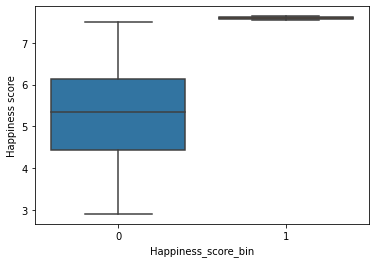

In [27]:
import seaborn as sns
sns.boxplot(x='Happiness_score_bin', y='Happiness score', data=df)

What is the maximum Happiness score where Happiness_score_bin is zero?

In [26]:
df[df['Happiness_score_bin']==0]['Happiness score'].max()

7.495

This is below the threshold of 7.5 which makes sense.

Again, we could try both of these variables in a predictive model.

## III. Other Transformations

Mathematical Functions like `sin()`, `log()`, `sqrt()` may be useful in creating predictors or transforming the response variable.

The following examples demonstrate transforming data, and their distributions.

**Example 1: Draw data from uniform distribution and take log**

Text(0.5, 1.0, 'Logged Data')

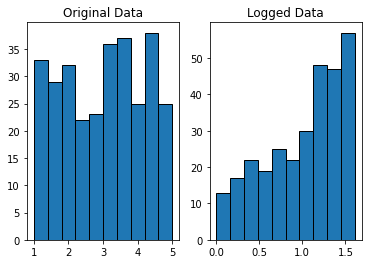

In [37]:
import matplotlib.pyplot as plt

# set a seed for reproducibility
np.random.seed(314)

# create uniform distributed random variable with 300 values
data = np.random.uniform(low=1, high=5, size=300)

# take natural log of data, base e
data_log = np.log(data)

# set grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=2)

# histograms
axs[0].hist(data, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

# add titles
axs[0].set_title('Original Data')
axs[1].set_title('Logged Data')

**Example 2: Compute sine of data**

Text(0.5, 1.0, 'Sine-Transformed Data')

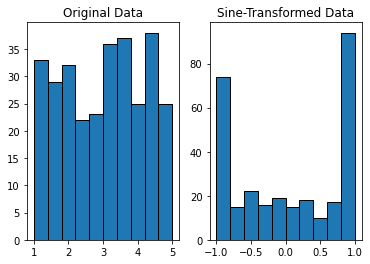

In [40]:
data_sine = np.sin(data)
fig, axs = plt.subplots(nrows=1, ncols=2)

# histograms
axs[0].hist(data, edgecolor='black')
axs[1].hist(data_sine, edgecolor='black')

# add titles
axs[0].set_title('Original Data')
axs[1].set_title('Sine-Transformed Data')

**Example 3: Compute square root of data**

NameError: name 'data_sqrt' is not defined

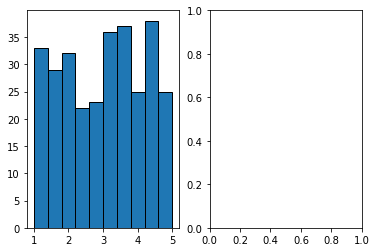

In [46]:
data_log= np.sqrt(data)
fig, axs = plt.subplots(nrows=1, ncols=2)

# histograms
axs[0].hist(data, edgecolor='black')
axs[1].hist(data_sqrt, edgecolor='black')

# add titles
axs[0].set_title('Original Data')
axs[1].set_title('Sqrt-Transformed Data')

**We got an error.  What went wrong, and how can we fix it?**

---

### TRY FOR YOURSELF (UNGRADED EXERCISES)

1) In our Country Happiness df, find the median of any column.  Then, create a new binarized version of the column, changing the values below the median to 0, and above the median to 1.

2) Standardize all the data in the Country Happiness df and verify that a few of the columns have a mean of 0 and standard deviation of 1.  Would this be helpful, why or why not?

3) Use the code `data = np.random.beta(a=4, b=15, size=100)` and perform different transformations and observe the results. 

---

### Summary

In this notebook, we've studied several common ways to transform data to make it more useful:

- standardizing data columns to put them on a common scale
- binarizing data columns to convert them to indicator functions with values 0 and 1
- one hot encoding of categorical data columns to make them numeric
- applying mathematical functions such as `sin()` and `sqrt()`

These transformations can make data easier to visualize, and more useful in predictive models